In [2]:
import pandas as pd
import numpy as np

### Descriptive Statistics

The dataset contained roughly 4644568 pages. By following the given format, I was able to parse through the data and find the following statistics. I chose to mainly focus on the 1476605 pages that had any number of reverts, as that was what the paper really focuses on. 

Out of those 1476605 pages, I found the average number of edits to be around 123, including reverts as individual edits. On average, 14 of those edits were reverts. The most number of reverts was about 15307. Out of these pages, the average M-Statistic was about 613. On average, there were about 0.4337219500137139 mutual editors, so not a whole lot. There were also about 60 editors per artcile.

There were roughly 25422 pages that met the "controversial cutoff," with M-Statistics above 1000. Out of those pages, the average M-Statistic was around 34928. And when we look at the average mutual editors in this case, there are about 10 mutual editors in each article, meaning that on average, many of these "controversial" articles have mainly a few editors editting out one another. Of course, there are the outliers, which we can see in the top 20 articles section below. The most number of mutual editors was 355 for one article. Additionally, there were on average over 834 editors per controversial article.

In [14]:
m_stat_df = pd.read_csv('data/out/second_en_wiki_m.txt')

In [25]:
m_desc_df = pd.read_csv('res2.csv')
m_desc_df.columns = ['Title', 'M-Stat', 'Sum', 'Num Mutual Editors', 'Num EditsReverts',
       'Num Editors', 'Num Edits']
m_desc_df['Num Reverts'] = m_desc_df['Num EditsReverts'] - m_desc_df['Num Edits']

In [30]:
m_desc_df.head()

,Title,M-Stat,Sum,Num Mutual Editors,Num EditsReverts,Num Editors,Num Edits,Num Reverts
0,Runbox,0,4,0,94,44,89,5
1,Dahil_Minahal_Mo_Ako,0,0,0,4,2,3,1
2,B.A.N_MONDAYS_CHERRY_MARTINEZ,0,0,0,8,3,7,1
3,Bill_Clymer,0,0,0,5,3,3,2
4,Sayed_Mansoor_Naderi,0,0,0,14,3,13,1


##### Number of Pages

In [11]:
m_stat_df.shape[0]

4644568

##### Number of Pages with Reverts

In [16]:
m_desc_df.shape[0]

1476605

##### Average Number of Edits (Including Reverts) for Pages with Reverts (fPwR)

In [43]:
m_desc_df['Num EditsReverts'].mean()

123.18940136326235

##### Average Number of Reverts fPwR

In [47]:
m_desc_df['Num Reverts'].mean()

14.840691315551553

##### Max Number of Reverts fPwR

In [48]:
m_desc_df['Num Reverts'].max()

15307

##### Average M Statistic fPwR

In [29]:
m_desc_df['M-Stat'].mean()

613.0619116148191

##### Average Number of Mutual Editors fPwR

In [31]:
m_desc_df['Num Mutual Editors'].mean()

0.4337219500137139

##### Most Number of Mutual Editors fPwR

In [32]:
m_desc_df['Num Mutual Editors'].max()

355

##### Average Number of Editors fPwR

In [42]:
m_desc_df['Num Editors'].mean()

60.30800992817984

##### Number of Controversial Pages

In [50]:
(m_desc_df['M-Stat'] > 1000).sum()

25422

##### Average M-Statistic from Controversial Pages

In [51]:
controversial_mask = m_desc_df['M-Stat'] > 1000
m_desc_df[controversial_mask]['M-Stat'].mean()

34928.322948627174

##### Average Number of Mutual Editors from Controversial Pages

In [52]:
m_desc_df[controversial_mask]['Num Mutual Editors'].mean()

10.568247974195579

##### Average Number of Editors from Controversial Pages

In [53]:
m_desc_df[controversial_mask]['Num Editors'].mean()

834.9140901581308

### Top/Bottom 20 M-Statistic
The top 20 articles in terms of their M-Statistic can be seen in the table below. They do not adimittedly match up exactly with the results found directly on the source website, but I believe this is due to different interpretations and calculations of the M-Statistic. As I mentioned in a Piazza post, the reference code's summation only summed up the pairs of editors that were mutual editors of one another and ignored all pairs of editors that were not mutual editors of one another. I, on the other hand, summed up all editors that had any revert, regardless of whether they were mutual reverters. Additionally, the reference code only counted those mutual pair edits at most once, even though the mutual pair may have edited each other multiple times (i.e. it only takes the minimum of the mutual pair once for the final sum). I counted these mutual pairs multiple times and used them as part of the summation for the number of times they reverted one another. Additionally, the code's sum does not account for the maximum like in the equation from the paper. I chose to remove any amount that was equal to the maximum, meaning possibly multiple pairs would have been removed for having equal maximums.

These discrepencies and many that could have occured in a missed translation from the paper's interpretability resulted in an, on average, higher number of controversial articles, with almost double the amount found on the website. However, this can be tweaked by changing the cutoff. And regardless, the top 20 is relatively similar to that of the paper's, with some slight shuffling. And the top few articles that showed up on my list and not theirs are very controversial, like the "Wikipedia" article (literally called Wikipedia) and the Lebanon War.

The bottom 20 I listed were not significant really in any way. They had low M-Statistics and are not very controversial, with few edits and reverts.

In [3]:
bottom_20 = m_stat_df.head(20)

In [4]:
m_stat_df = m_stat_df.sort_values('Statistic', ascending=False)

In [5]:
top_20 = m_stat_df.iloc[:20]

In [6]:
top_20

,Title_ID,Title,Statistic
3414534,3414534,George_W._Bush,34813075
3713406,3713406,List_of_World_Wrestling_Entertainment_employees,21728308
4644567,4644567,Anarchism,20108760
4632036,4632036,Muhammad,13696900
4347330,4347330,Barack_Obama,10713048
3046859,3046859,Global_warming,9387070
2384506,2384506,Circumcision,8561498
3409820,3409820,United_States,7448470
4128707,4128707,Jesus,7403452
1462062,1462062,Michael_Jackson,6798324


In [7]:
bottom_20

,Title_ID,Title,Statistic
0,0,Blackboard,0
1,1,Coimbatore_tile_company,0
2,2,The_moonstone_2,0
3,3,African_Hunting_Wasps,0
4,4,Morgan_Sheardown,0
5,5,Hymenocaris,0
6,6,Erica_barstein,0
7,7,Ben_clarke,0
8,8,British_association_for_cognitive_and_behaviou...,0
9,9,Ocportal,0


### Plot of Abraham Lincoln over Time
We can see certain spikes in the M-Statistic, which likely correlate to specific times of heavy editing.

In [8]:
abe_df = pd.read_csv('data/out/overtime_abe.txt')
abe_df['Date'] = pd.to_datetime(abe_df['Timestamp']).dt.date

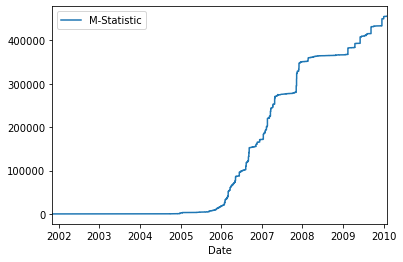

In [11]:
abe_df.plot.line(x='Date', y='M-Statistic')

### Plot of Anarchism over Time
We can see certain spikes in the M-Statistic, which likely correlate to specific times of heavy editing.

In [10]:
anar_df = pd.read_csv('data/out/overtime_anarchism.txt')
anar_df['Date'] = pd.to_datetime(anar_df['Timestamp']).dt.date

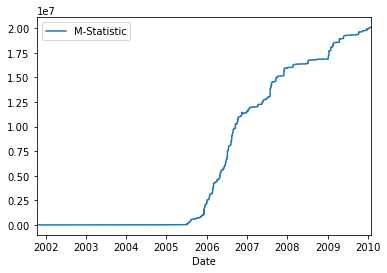

In [12]:
anar_df.plot.line(x='Date', y='M-Statistic')

##### (Raw Data to Light Dump Revisited)
I refractored the code to be able to mimic this. You can see this in the test/Revisited_Evidence folder in the codebase. 